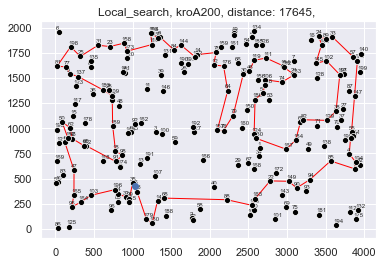

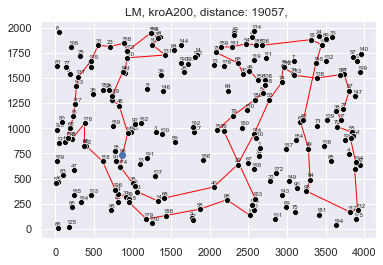

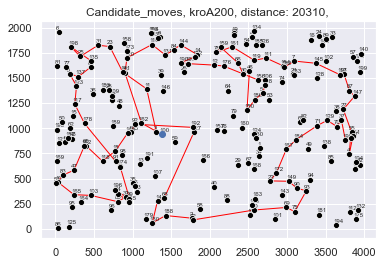

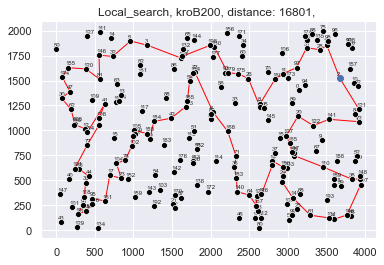

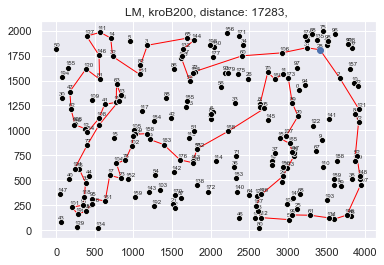

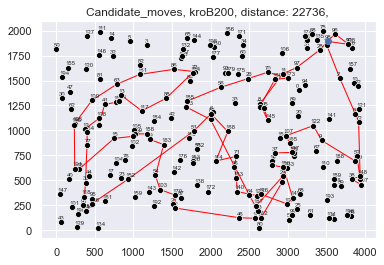

,strategy,instance,cost,time
0,Local_search,kroA200,17645,15.295123
0,LM,kroA200,19057,15.335811
0,Candidate_moves,kroA200,20310,11.411308
0,Local_search,kroB200,16801,10.152838
0,LM,kroB200,17283,5.804471
0,Candidate_moves,kroB200,22736,9.660123


In [3]:
from collections import defaultdict
from itertools import product
from random import seed

import seaborn as sns
import numpy as np
from tqdm import tqdm

from strategies.greedy_cycle.cheapest_insertion import CheapestInsertion
from api.instance import Instance
from strategies.local_search.local_search import LocalSearch
from strategies.local_search_candidates_moves.local_search_candidates_moves import LocalSearchWitchCandidatesMoves
from strategies.ls_cache.local_search_with_cache import LocalSearchWitchCache
from utils.utils import draw_solution
import pandas as pd

sns.set()
df = pd.DataFrame(columns=['strategy','instance', 'cost', 'time'])
for instance_name in ['kroA200', 'kroB200']:
    instance = Instance(name=instance_name)
    solve_strategy1: LocalSearch = LocalSearch(
        instance=instance,
        version="steepest",
        neighbourhood="edge",
    )
    solve_strategy2: LocalSearchWitchCandidatesMoves = LocalSearchWitchCandidatesMoves(instance=instance)
    solve_strategy3: LocalSearchWitchCache = LocalSearchWitchCache(instance=instance)
    
    solve_strategies = {}
    solve_strategies["Local_search"] = solve_strategy1
    solve_strategies["LM"] = solve_strategy3
    solve_strategies["Candidate_moves"] = solve_strategy2
    
    for str_id in solve_strategies.keys():
        solve_strategy = solve_strategies[str_id]
        solve_strategy.run(run_times=1)
        for s, cost, time in solve_strategy.solutions:
            df = df.append(pd.DataFrame([[str_id, instance_name, cost, time]], columns=['strategy','instance', 'cost', 'time']))
        costs = list(map(lambda x: x[1], solve_strategy.solutions))
        draw_solution(
            instance=instance,
            solution=solve_strategy.solution,
            title=f'{str_id}, {instance.name}, distance: {solve_strategy.solution_cost}, ',
            save_file_name=f'{instance.name}_{min(costs)}_{str_id}.png'
        )
df

In [5]:
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 0
Data columns (total 4 columns):
strategy    6 non-null object
instance    6 non-null object
cost        6 non-null float64
time        6 non-null float64
dtypes: float64(2), object(2)
memory usage: 192.0+ bytes


In [5]:
df_cost = df.groupby(['instance', 'strategy']).agg({'cost' : ['min','mean', 'max']}).astype(int)
df_cost

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="3" halign="left">cost</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>min</th>
      <th>mean</th>
      <th>max</th>
    </tr>
    <tr>
      <th>instance</th>
      <th>strategy</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">kroA200</th>
      <th>Candidate_moves</th>
      <td>25505</td>
      <td>30876</td>
      <td>35974</td>
    </tr>
    <tr>
      <th>LM</th>
      <td>16717</td>
      <td>17763</td>
      <td>19516</td>
    </tr>
    <tr>
      <th>Local_search</th>
      <td>15658</td>
      <td>17272</td>
      <td>18369</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">kroB200</th>
      <th>Candidate_moves</th>
      <td>25514</td>
      <td>31957</td>
      <td>38085</td>
    </tr>
    <tr>
      <th>LM</th>
      <td>16478</td>
      <td>17770</td>
      <td>19713</td>
    </tr>
    <tr>
      <th>Local_search</th>
      <td>16466</td>
      <td>16959</td>
      <td>17366</td>
    </tr>
  </tbody>
</table>
</div>

In [6]:
df_time = df.groupby(['instance','strategy']).agg({'time' : ['min','mean', 'max']}).round(3)
df_time

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="3" halign="left">time</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>min</th>
      <th>mean</th>
      <th>max</th>
    </tr>
    <tr>
      <th>instance</th>
      <th>strategy</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">kroA200</th>
      <th>Candidate_moves</th>
      <td>10.377</td>
      <td>18.465</td>
      <td>26.797</td>
    </tr>
    <tr>
      <th>LM</th>
      <td>4.822</td>
      <td>6.470</td>
      <td>9.183</td>
    </tr>
    <tr>
      <th>Local_search</th>
      <td>6.552</td>
      <td>11.984</td>
      <td>14.855</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">kroB200</th>
      <th>Candidate_moves</th>
      <td>8.773</td>
      <td>11.045</td>
      <td>13.296</td>
    </tr>
    <tr>
      <th>LM</th>
      <td>4.873</td>
      <td>6.799</td>
      <td>10.054</td>
    </tr>
    <tr>
      <th>Local_search</th>
      <td>7.270</td>
      <td>9.457</td>
      <td>12.728</td>
    </tr>
  </tbody>
</table>
</div>